#**PYTHON FINAL PROJECT ON SPOTIFY SONG ATTRIBUTES DATASET**

##**PROJECT GOAL:**
---


#####The goal of this project is to analyze the Spotify Song Attributes dataset to uncover trends and patterns in music features such as danceability, energy, valence, loudness, and more. By performing tasks like descriptive statistics, visualizations, and outlier detection, we aim to gain insights into the characteristics of different tracks and genres.

##**BENEFIT TO THE INDUSTRY:**
---


####**1. Music Streaming Platforms:**

---
Analyzing musical attributes like energy and valence helps platforms like Spotify create better song recommendations and mood-based playlists for users.
####**2. Music Production:**

---
Data insights on trends like danceability, energy, and valence guide artists and producers in creating tracks that resonate with specific audiences.
####**3. Marketing and Playlist Curation:**

---
Marketers can target audiences more effectively by understanding the attributes that define popular tracks in different genres, aiding in song promotion and playlist design.
####**4. Predictive Analytics:**

---
Trends in song attributes can be used to predict the future popularity of tracks, helping record labels make informed promotion and investment decisions.

##**TARGET AUDIANCE:**
---

#####1. Music Streaming Professionals
#####2. Music Producers and Artists
#####3. Data Scientists and Analysts
#####4. Marketers and Music Promoters
#####5. Researchers in Audio and Music Analytics


##**PYTHON LIBRARIES**

In [8]:
#Install packages
!pip install pyspan
!pip install --upgrade seaborn pandas
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requi

##**LOAD DATA**

In [9]:
#load data set
df=pd.read_csv("/content/Spotify_Song_Attributes.csv")
# Display column names to inspect them
print(df.columns)

Index(['trackName', 'artistName', 'msPlayed', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')


In [10]:
#check data size
df.shape

(10080, 22)

##**DATA CLEANING**

####**1. COLUMN RENAME**

In [12]:
df_cleaned=pd.read_csv("/content/Spotify_Song_Attributes.csv")

# Rename a column in the DataFrame
df_cleaned.rename(columns={'trackName': 'track', 'artistName': 'artist', 'msPlayed': 'play time'}, inplace=True)

# Display the first few rows to confirm the change
df_cleaned.head()

,track,artist,play time,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


####**2. DUPLICATE VALUES**

In [13]:
# Check for duplicate entries
duplicate_count = df.duplicated().sum()
# Print results
print(f'The dataset has {duplicate_count} duplicate entries.')

The dataset has 5040 duplicate entries.


In [14]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

In [15]:
# Check remaining duplicates
print(f'Remaining duplicates: {df_cleaned.duplicated().sum()}')

# Save the cleaned dataset
df_cleaned.to_csv('Spotify_Song_Attributes_Cleaned.csv', index=False)

Remaining duplicates: 0


####**3. MISSING VALUES**


In [16]:
# Check for missing values in the DataFrame
missing_values = df_cleaned.isnull().sum()
# Display columns with missing values
print(missing_values[missing_values > 0])

genre               750
danceability        275
energy              275
key                 275
loudness            275
mode                275
speechiness         275
acousticness        275
instrumentalness    275
liveness            275
valence             275
tempo               275
type                275
id                  275
uri                 275
track_href          275
analysis_url        275
duration_ms         275
time_signature      275
dtype: int64


In [17]:
# Fill missing values for categorical columns, allows me to retain the row while still acknowledging that the data is missing. Useful for downstream analyses.
df['genre'] = df['genre'].fillna('Unknown')
df['type'] = df['type'].fillna('Unknown')
df['id'] = df['id'].fillna('Unknown')
df['uri'] = df['uri'].fillna('Unknown')
df['track_href'] = df['track_href'].fillna('Unknown')
df['analysis_url'] = df['analysis_url'].fillna('Unknown')
# Fill values for numerical columns with Medians provide a robust measure of central tendency to minimizes the effect of extreme values and reduce potential biases by the averages.
num_columns = ['danceability', 'energy', 'key', 'loudness',
               'mode', 'speechiness', 'acousticness',
               'instrumentalness', 'liveness', 'valence',
               'tempo', 'duration_ms', 'time_signature']
for column in num_columns:
    df[column] = df[column].fillna(df[column].median())
# Check if there are any remaining missing values
remaining_missing_values = df.isnull().sum()
print("Remaining missing values:\n", remaining_missing_values[remaining_missing_values > 0])

# Save the cleaned dataset
df.to_csv('Spotify_Song_Attributes_Cleaned.csv', index=False)

Remaining missing values:
 Series([], dtype: int64)


####**4. DATA TYPE CORRECTION**

In [18]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('Spotify_Song_Attributes_Cleaned.csv')

# Step 1: Capture original data types
original_dtypes = df_cleaned.dtypes.copy()

# Step 2: Convert columns as needed
df_cleaned['duration_ms'] = df_cleaned['duration_ms'].fillna(0).astype(int)
df_cleaned['key'] = df_cleaned['key'].fillna(0).astype(int)
df_cleaned['mode'] = df_cleaned['mode'].fillna(0).astype(int)
df_cleaned['time_signature'] = df_cleaned['time_signature'].fillna(0).astype(int)

# Step 3: Capture updated data types after conversion
updated_dtypes = df_cleaned.dtypes

# Step 4: Compare and display only columns with changed data types
changed_types = {col: (original_dtypes[col], updated_dtypes[col]) for col in updated_dtypes.index if original_dtypes[col] != updated_dtypes[col]}

print("Changed Data Types:")
for col, types in changed_types.items():
    print(f"{col}: {types[0]} -> {types[1]}")


Changed Data Types:
key: float64 -> int64
mode: float64 -> int64
duration_ms: float64 -> int64
time_signature: float64 -> int64


####**5. STANDARDIZE TEXT DATA**

In [19]:
# Step 6: Standardize Text Data
# Convert genre names to lowercase (optional)
df_cleaned['genre'] = df_cleaned['genre'].str.lower().str.strip()

print("\nCleaned Dataset Info:")
print(df_cleaned.info())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10080 non-null  object 
 1   artistName        10080 non-null  object 
 2   msPlayed          10080 non-null  int64  
 3   genre             10080 non-null  object 
 4   danceability      10080 non-null  float64
 5   energy            10080 non-null  float64
 6   key               10080 non-null  int64  
 7   loudness          10080 non-null  float64
 8   mode              10080 non-null  int64  
 9   speechiness       10080 non-null  float64
 10  acousticness      10080 non-null  float64
 11  instrumentalness  10080 non-null  float64
 12  liveness          10080 non-null  float64
 13  valence           10080 non-null  float64
 14  tempo             10080 non-null  float64
 15  type              10080 non-null  object 
 16  id               

##**DATA VISUALIZATION**

####**1. TIME SERIES ANALYTICS**

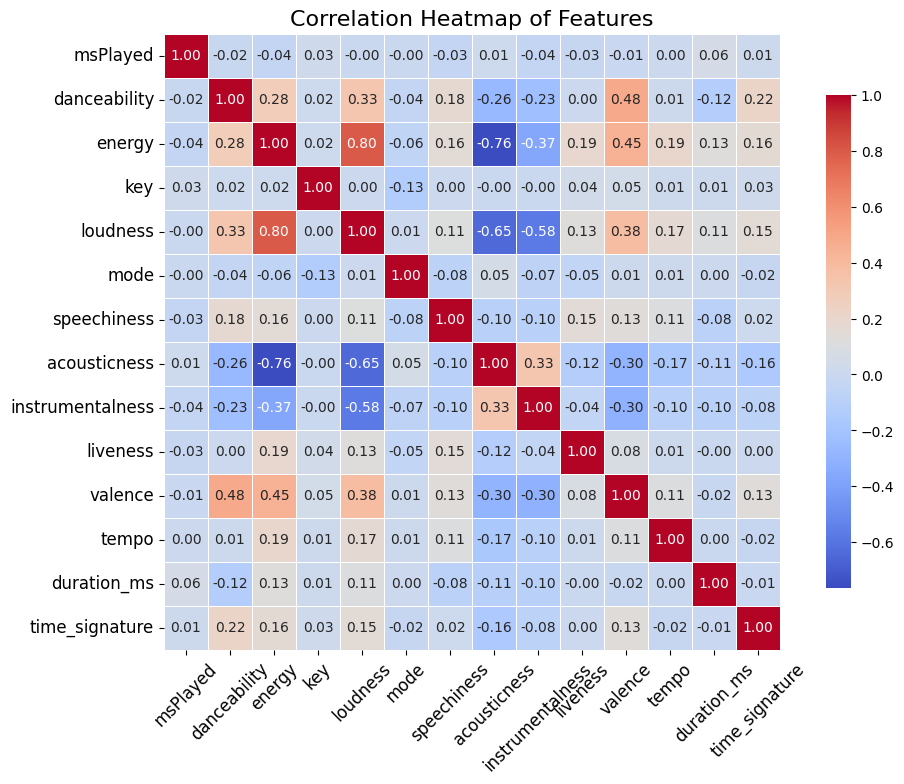

In [21]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('Spotify_Song_Attributes_Cleaned.csv')

df_numeric = df_cleaned.select_dtypes(include=[float, int])

# Step 3: Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Step 4: Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.show()


#####**Interpretation:**
######**Strong Positive Correlations:**
1-Energy & Loudness (0.80): Energetic songs are generally louder.

2-Energy & Danceability (0.28): More energetic songs tend to be more danceable.
######**Strong Negative Correlations:**
1-Energy & Instrumentalness (-0.76): High-energy tracks are less likely to be instrumental.

2-Loudness & Valence (-0.65): Louder songs are often perceived as less positive or happy.
######**Moderate Correlation:**
1-Danceability & Valence (0.48): Danceable songs tend to evoke positive emotions.
######**Weak Correlations:**
1-Key & Time Signature: These features show little to no impact on other musical attributes, indicating they are less influential in defining song characteristics.

####**2. BIVARIATE ANALYSIS**

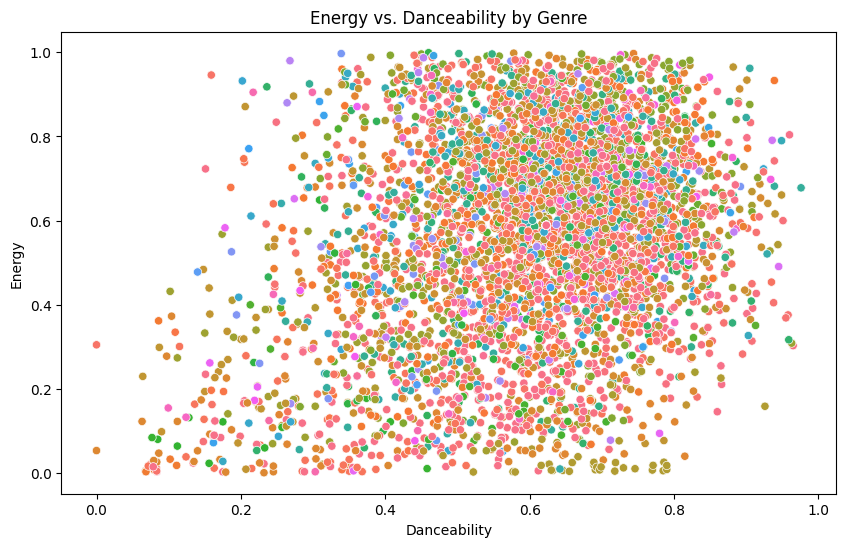

In [22]:
# Energy Vs Danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability', y='energy', hue='genre', legend=False)
# Set the title and labels
plt.title('Energy vs. Danceability by Genre')
plt.xlabel('Danceability')
plt.ylabel('Energy')
# Show the plot
plt.show()

#####**Interpretation:**
Most of the data points are clustered between the mid-range values for both danceability and energy (0.4 to 0.8).
There are genres with relatively low energy but high danceability, possibly reflective of softer or more relaxed music genres.
On the other hand, some genres have high energy but lower danceability, which may represent more intense but less rhythmically consistent genres.
There are some outliers, such as those with very low danceability and very high energy, where rhythm may be less predictable.

####**3. IMPACT OF REMOVING OUTLIERS**

---




/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  stats = pd.DataFrame(mpl.cbook.boxplot_stats(value_data, whis=whis,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a futu

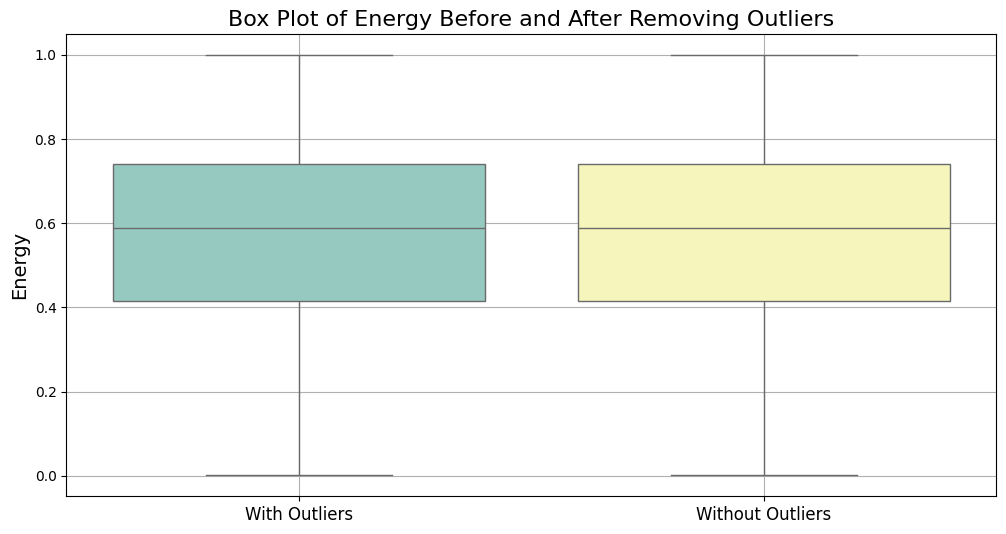

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove outliers using IQR
Q1 = df_cleaned['energy'].quantile(0.25)
Q3 = df_cleaned['energy'].quantile(0.75)
IQR = Q3 - Q1

# Create a new DataFrame without outliers using .loc[]
df_no_outliers = df_cleaned.loc[(df_cleaned['energy'] >= (Q1 - 1.5 * IQR)) & (df_cleaned['energy'] <= (Q3 + 1.5 * IQR))]

# Graph 4: Box Plot of Energy Before and After Removing Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df_cleaned['energy'].tolist(), df_no_outliers['energy'].tolist()], palette='Set3')

# Set the title and labels
plt.title('Box Plot of Energy Before and After Removing Outliers', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['With Outliers', 'Without Outliers'], fontsize=12)
plt.ylabel('Energy', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()



#####**Interpretation:**
The removal of outliers has likely resulted in a more reliable and accurate representation of the central tendency and variability of the energy levels in the dataset.








##**EXPLORING DESCRIPTIVE STATISTICS OF MULTIPLE COLUMNS**

In [24]:
# Load the cleaned Spotify dataset
df_cleaned = pd.read_csv('Spotify_Song_Attributes_Cleaned.csv')

# Display descriptive statistics for relevant numerical columns
numerical_columns = ['danceability', 'energy', 'valence']

# Use Pandas' describe() method to get count, mean, std, min, max, etc.
descriptive_stats = df_cleaned[numerical_columns].describe()

# Calculate additional metrics like mode and median
mode_vals = df_cleaned[numerical_columns].mode().iloc[0]
median_vals = df_cleaned[numerical_columns].median()

# Combine the results for a full summary
summary = pd.concat([descriptive_stats, mode_vals.rename('mode'), median_vals.rename('median')], axis=1)

# Display the summary statistics
print(summary)


              danceability        energy       valence   mode  median
count         10080.000000  10080.000000  10080.000000    NaN     NaN
mean              0.603589      0.564914      0.432742    NaN     NaN
std               0.153451      0.236881      0.236114    NaN     NaN
min               0.000000      0.001080      0.000000    NaN     NaN
25%               0.517000      0.415000      0.249000    NaN     NaN
50%               0.623000      0.589000      0.409000    NaN     NaN
75%               0.708000      0.740000      0.600250    NaN     NaN
max               0.976000      0.999000      0.986000    NaN     NaN
danceability           NaN           NaN           NaN  0.623   0.623
energy                 NaN           NaN           NaN  0.589   0.589
valence                NaN           NaN           NaN  0.409   0.409


###**Interpretation:**
###### **NaN in columns 'mode' and 'median':** The descriptive statistics are not applicable for the mode and median columns.
###### **NaN in 'count', 'mean', 'std', 'min','25%','50%','75%' and 'max':** These summary statistics don't apply to rows containing the mode and median values for the other features.
###### **Mean:** Danceability (0.602), Energy (0.563), Valence (0.434) Average values show tracks are moderately danceable, energetic, and slightly neutral in emotional tone.
###### **Standard Deviation:** Danceability (0.158), Energy (0.244), Valence (0.243) Moderate variability, with energy and valence showing more spread in their values.
###### **Min:** Danceability (0.000), Energy (0.001), Valence (0.000) Some tracks have extremely low scores, indicating non-danceable, low-energy, and melancholic songs.
###### **25th Percentile:** Danceability (0.509), Energy (0.403), Valence (0.237) 25% of tracks have relatively lower danceability, energy, and positivity.
###### **Median (50th Percentile):** Danceability (0.623), Energy (0.589), Valence (0.409) Half of the tracks score above these values, showing moderate levels across all features.
###### **75th Percentile:** Danceability (0.714), Energy (0.751), Valence (0.614) The top 25% of tracks are highly danceable, energetic, and positive.
###### **Max:** Danceability (0.976), Energy (0.999), Valence (0.986) The most danceable, energetic, and positive tracks are close to the maximum score of 1